### Data preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(

In [54]:
data1 = pd.read_csv('/Users/thuongnguyen/Downloads/customer_engagement_prj/Part4 2/data_1.csv')
data2 = pd.read_csv('/Users/thuongnguyen/Downloads/customer_engagement_prj/Part4 2/data_2.csv')
data3 = pd.read_csv('/Users/thuongnguyen/Downloads/customer_engagement_prj/Part4 2/data_3.csv')
data4 = pd.read_csv('/Users/thuongnguyen/Downloads/customer_engagement_prj/Part4 2/data_4.csv')


In [75]:
data1.head()



,student_id,minutes_watched,paid_in_q2
0,767,0.05,0
1,1067,0.27,0
2,1151,122.35,0
3,1571,77.60,0
4,2058,0.42,0


In [109]:
data2. head()


,student_id,minutes_watched,paid_in_q2
0,516,46.27,1
1,520,91.18,1
2,523,1322.25,1
3,603,8.18,1
4,608,387.68,1


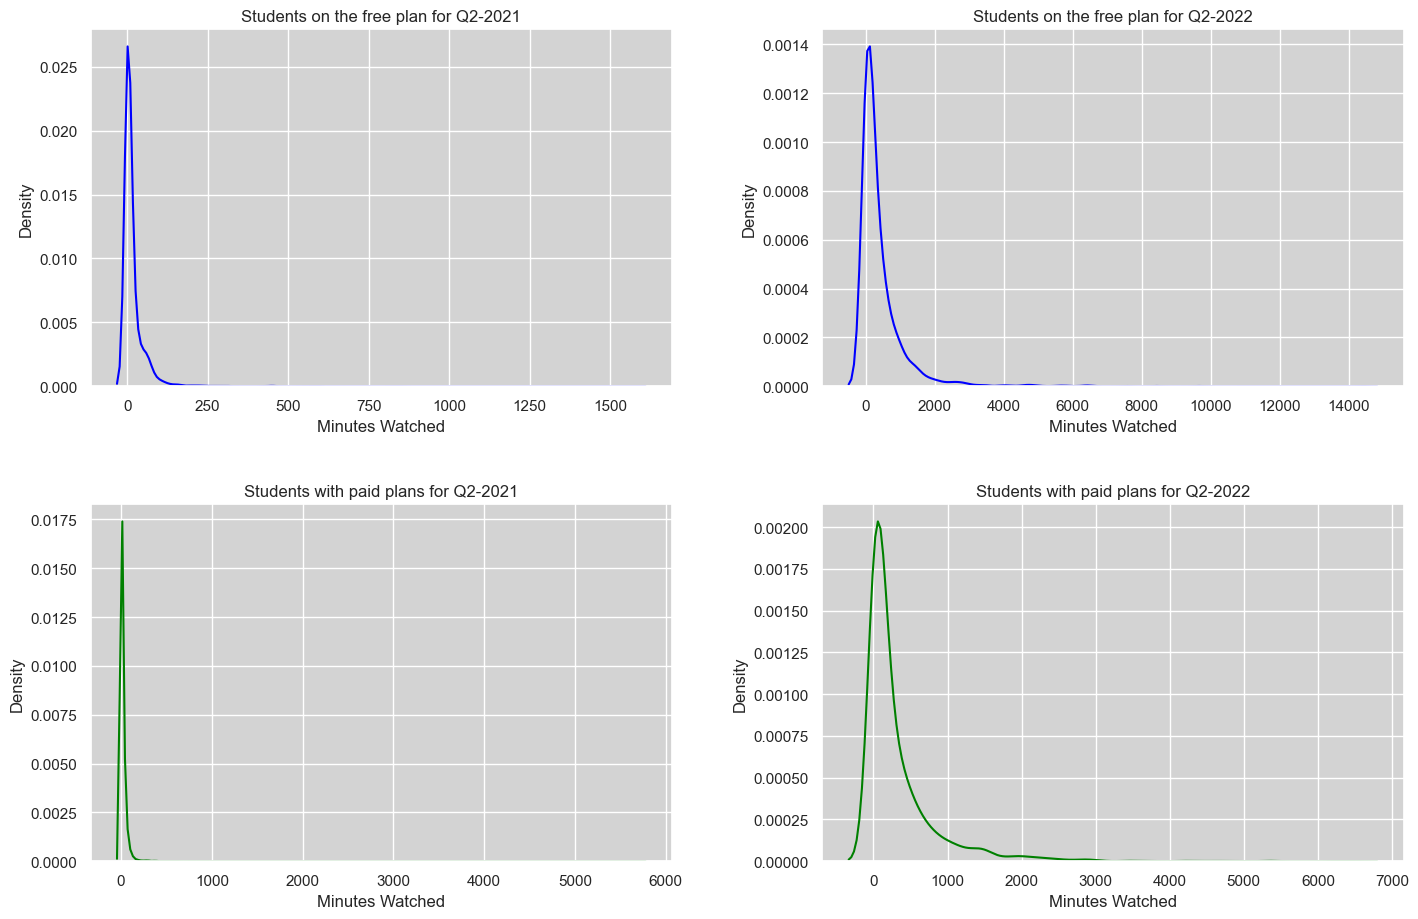

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax in axes.flat:
    ax.set_facecolor('lightgrey')  # Set subplot background color

# Plot KDEs for each dataset 
sns.kdeplot(data1['minutes_watched'], ax=axes[0, 0], color='blue')
axes[0, 0].set(title='Students on the free plan for Q2-2021', xlabel='Minutes Watched', ylabel='Density')

sns.kdeplot(data2['minutes_watched'], ax=axes[0, 1], color='blue')
axes[0, 1].set(title='Students on the free plan for Q2-2022', xlabel='Minutes Watched', ylabel='Density')

sns.kdeplot(data3['minutes_watched'], ax=axes[1, 0], color='green')
axes[1, 0].set(title='Students with paid plans for Q2-2021', xlabel='Minutes Watched', ylabel='Density')

sns.kdeplot(data4['minutes_watched'], ax=axes[1, 1], color='green')
axes[1, 1].set(title='Students with paid plans for Q2-2022', xlabel='Minutes Watched', ylabel='Density')

fig.tight_layout(pad=3.0)

plt.show()

* The plots show that the distributions of students' viewing minutes are right-skewed, indicating the presence of outliers who watch much more than most students. This skewness will affect our metrics, particularly inflating the mean and standard deviation,  reflecting greater variability than most students experience. So we would want to remove the outliers


In [57]:
#look at outliers
o_1 = data1['minutes_watched'].quantile(0.99)
o_1

167.08470000000017

In [58]:
o_2 = data2['minutes_watched'].quantile(0.99)
o_2

3390.482800000001

In [ ]:
o_3 = data3['minutes_watched'].quantile(0.99)
o_3

In [ ]:
o_4 = data4['minutes_watched'].quantile(0.99)
o_4

In [ ]:
df1=data1[data1['minutes_watched']<o_1]
df1

In [60]:
df2=data2[data2['minutes_watched']<o_2]
df2

2505.3450000000003

In [ ]:
df3=data3[data3['minutes_watched']<o_3]
df3

In [ ]:
df4=data4[data4['minutes_watched']<o_4]
df4

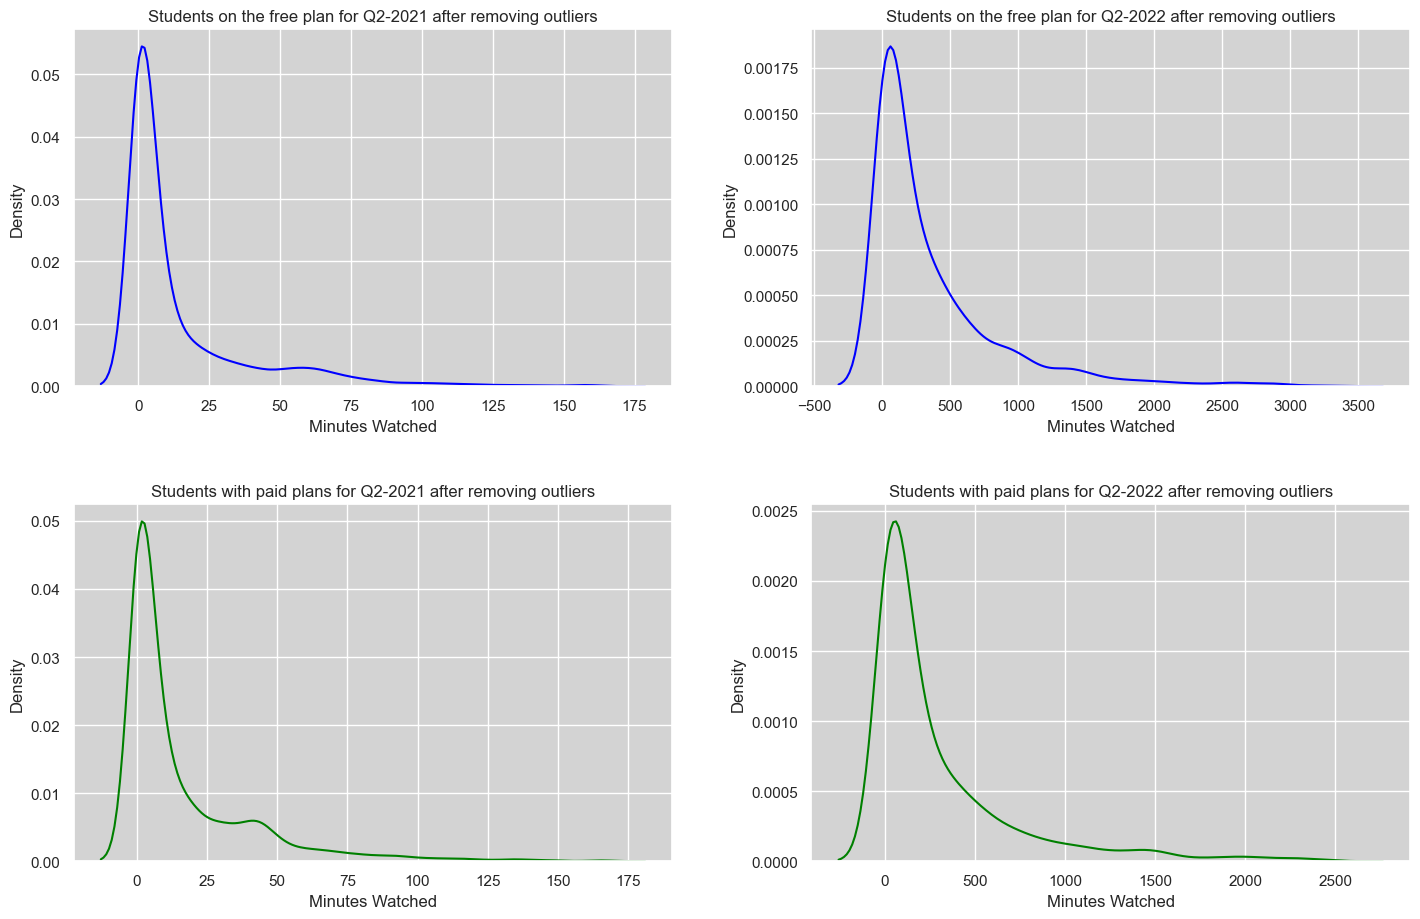

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), facecolor='white')  # Set figure background color

# Customize the background color of each subplot
for ax in axes.flat:
    ax.set_facecolor('lightgrey')  
sns.kdeplot(df1['minutes_watched'], ax=axes[0, 0], color='blue')
axes[0, 0].set(title='Students on the free plan for Q2-2021 after removing outliers', xlabel='Minutes Watched', ylabel='Density')

sns.kdeplot(df2['minutes_watched'], ax=axes[0, 1], color='blue')
axes[0, 1].set(title='Students on the free plan for Q2-2022 after removing outliers', xlabel='Minutes Watched', ylabel='Density')

sns.kdeplot(df3['minutes_watched'], ax=axes[1, 0], color='green')
axes[1, 0].set(title='Students with paid plans for Q2-2021 after removing outliers', xlabel='Minutes Watched', ylabel='Density')

sns.kdeplot(df4['minutes_watched'], ax=axes[1, 1], color='green')
axes[1, 1].set(title='Students with paid plans for Q2-2022 after removing outliers', xlabel='Minutes Watched', ylabel='Density')

fig.tight_layout(pad=3.0)

# Show the plot
plt.show()

In [77]:
#Save updated data after processing as CVS files
df1.to_csv('/Users/thuongnguyen/Documents/2021_free_no_outliers.csv',index=False)
df2.to_csv('/Users/thuongnguyen/Documents/2022_free_no_outliers.csv',index=False)
df3.to_csv('/Users/thuongnguyen/Documents/2021_paid_no_outliers.csv',index=False)
df4.to_csv('/Users/thuongnguyen/Documents/2022_paid_no_outliers.csv',index=False)

### Data Prediction 

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [89]:
df = pd.read_csv('/Users/thuongnguyen/Downloads/customer_engagement_prj/_/minutes_certificates.csv')


In [90]:
target = df['certificates_issued']
inputs = df['minutes_watched']


In [91]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2,random_state=3)

In [92]:
# convert to NumPy ndarrays
x_train = x_train.to_numpy() 
x_test = x_test.to_numpy() 
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy() 

In [93]:
#
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [94]:
#train the model by creating an instance of LinearRegression model and then fiting into training 
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [96]:
reg.intercept_, reg.coef_


(1.131801500612512, array([0.00170173]))

In [99]:
#find R-squared
reg.score(x_train, y_train)

0.26298386639312954

The value we obtained is approximately 0.2629. This shows that around 27% of the variability in the target variable-the number of certificates-can be explained by the input variable. Consequently, the model accounts for only 27% of the variation, leaving more than 70% of the variability unexplained by this input variable.This suggests that the input or predictable variable (minutes watched) has a moderate but not overwhelming impact on the number of certificates issued. So we should consider exploring additional predictors, or interactions between variables,

In [102]:
prediction_test = reg.predict(x_test)

reg.predict([[1100]])

array([3.0036996])

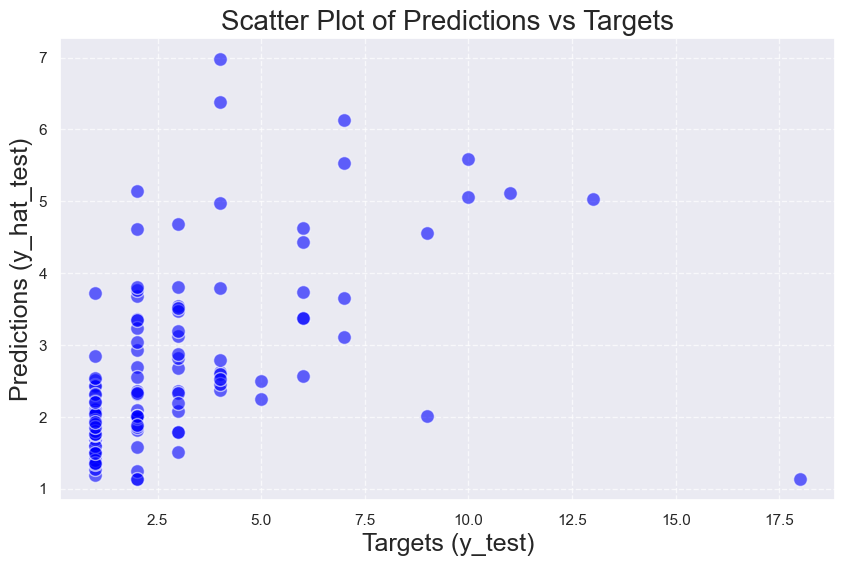

In [106]:

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat_test, alpha=0.6, edgecolors='w', s=100, c='blue')

# Add labels and title
plt.xlabel('Targets (y_test)', fontsize=18)
plt.ylabel('Predictions (y_hat_test)', fontsize=18)
plt.title('Scatter Plot of Predictions vs Targets', fontsize=20)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend if you include a reference line

# Show the plot
plt.show()
